### Discrete-time quantum walk

Defining a quantum counterpart to a discrete-time random walk proves more challenging than for a continuous-time random walk. In the simplest form of a discrete-time random walk on graph \(G\), we move from any given vertex to each of its neighbors with equal probability. This process is governed by the $|V| \times |V|$ matrix \(M\) with entries

$
M_{jk} =
\begin{cases}
\frac{1}{\deg(k)} & \text{if } (j, k) \in E \\
0 & \text{otherwise}
\end{cases}
$

for $j, k \in V$. An initial probability distribution $p$ over the vertices evolves to $p' = Mp$ after one step of the walk.

To create a quantum analog of this process, we aim to define a unitary operator $U$ such that an input state $|j\rangle$ corresponding to the vertex $j \in V$ evolves into a superposition of the neighbors of $j$. We want this to occur similarly at each vertex, so we propose the definition:

$
|j\rangle \xrightarrow{U} |\phi_j\rangle := \frac{1}{\sqrt{\deg(j)}} \sum_{k : (j,k) \in E} |k\rangle
$

However, upon further reflection, we find that this typically does not define a unitary transformation. This is because the orthogonal states $|j\rangle$ and $|k\rangle$ corresponding to adjacent vertices $j$ and $k$ with a common neighbor $\ell $ evolve into non-orthogonal states. We might circumvent this issue by introducing phases, but this approach would violate the goal of defining a consistent process at each vertex. Moreover, some graphs inherently do not permit local unitary dynamics.

We can overcome this difficulty by enlarging the Hilbert space, an idea proposed by Watrous as part of a logarithmic-space quantum algorithm for deciding whether two vertices are connected in a graph. The Hilbert space can consist of states of the form $|j, k\rangle$, where $(j, k) \in E$. We can view the walk as taking place on the (directed) edges of the graph, with the state $|j, k\rangle$ representing a walker at vertex $j$ moving towards vertex $k$. Each step of the walk consists of two operations.

**Coin Operator:**

First, we apply a unitary transformation that operates on the second register conditional on the first register. This transformation is sometimes called a "coin flip" because it determines the walker's next destination. A common choice is the Grover diffusion operator over the neighbors of $j$, defined as:

$
C := \sum_{j \in V} |j\rangle \langle j| \otimes (2 |\phi_j\rangle \langle \phi_j| - I).
$

**Shift Operator:**

Next, the walker is moved to the vertex indicated in the second register. Since the process must be unitary, the only way to achieve this is by swapping the two registers using the operator

$
S := \sum_{(j,k) \in E} |j, k\rangle \langle k, j|.
$

Overall, one step of the discrete-time quantum walk is described by the unitary operator $SC$.

Reference: Lecture Notes on Quantum Algorithms, Andrew M. Childs.

# Assignment 6.12

Design the quantum walk operator for the case of a line with 16 nodes:
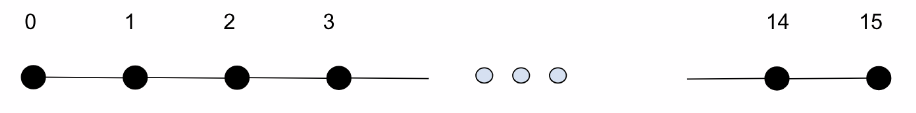


# Solution

The first step is to install Classiq and get authentication.

In [1]:
!pip install --upgrade pip
!pip install 'classiq[all]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 59.3 MB/s eta 0:0

In [24]:
import classiq
classiq.authenticate()

Your user code: RXTS-XCBM
If a browser doesn't automatically open, please visit this URL from any trusted device: https://auth.classiq.io/activate?user_code=RXTS-XCBM


In [25]:
#We also need to import the following :

from classiq import *
from classiq.qmod.symbolic import logical_or
from classiq.execution import ExecutionPreferences

In [26]:
#In order to represent the 16 vertices, we need 4 qubits since 16=2^4.
num_qubits = 4
num_vertices = 2**num_qubits # Total number of nodes (16 nodes)

In the following we implement the ***coin operator C***. To do so, we need to define several functions. The coin operator is responsible for determining the next state of the walk by applying a unitary transformation, often likened to a "coin flip".

**prepare\_minus(x: QBit):**


*  Purpose: Prepares a qubit in the  $\left| - \right\rangle$ state.
*  Details: The  $\left| - \right\rangle$ state is created by applying an $X$ gate (bit-flip) followed by a Hadamard $H$ gate to the qubit $x$.

In [27]:
@qfunc
def prepare_minus(x: QBit):
    X(x)
    H(x)

**Diffuzer_oracle(aux: Output[QNum], x: QNum):**



*  Implements a diffuser oracle for Grover's algorithm, which marks the solution by flipping the phase of the auxiliary qubit.
*   The auxiliary qubit's state is toggled based on whether
𝑥.


In [28]:
@qfunc
def diffuzer_oracle(aux: Output[QNum],x:QNum):
    aux^=(x!=0)

**Zero_diffuzer(x: QNum):**



* Purpose: Implements the zero diffuser for the quantum walk.
* Details: Allocates an auxiliary qubit and prepares it in the
∣−⟩ state using prepare_minus.
Applies the diffuser oracle diffuzer_oracle.

In [30]:
@qfunc
def zero_diffuzer(x: QNum):
    aux = QNum('aux')
    allocate(1,aux)
    within_apply(compute=lambda: prepare_minus(aux),action=lambda: diffuzer_oracle)

**C_iteration(i: int, vertices: QNum, adjacent_vertices: QNum):**

*   Purpose: Defines the coin operation for the quantum walk at a specific node.
*   Details:
Initializes a probability vector prob based on the current node $i$:
If $i$ is the first node, the walker moves to the right.
If $i$ is the last node, the walker moves to the left.
Otherwise, the walker has equal probabilities of moving left or right.
Uses the control function to conditionally apply operations based on the current node $i$.






In [31]:
def C_iteration(i:int,vertices: QNum, adjacent_vertices:QNum):
    prob = [0]*num_vertices
    if i == 0:
        prob[i + 1] = 1.0
    elif i == num_vertices - 1:
        prob[i - 1] = 1.0
    else:
        prob[i - 1] = 0.5
        prob[i + 1] = 0.5
    print(f'Node={i}, prob vec ={prob}')
    control(ctrl=vertices==i,
            operand=lambda: within_apply(
              compute= lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
              action= lambda: zero_diffuzer(adjacent_vertices)))

**C_operator(vertices: QNum, adjacent_vertices: QNum):**



*   Purpose: Applies the coin operator to all vertices.
*   Details: Iterates through each node and applies the C_iteration function.

In [32]:
@qfunc
def C_operator(vertices:QNum, adjacent_vertices: QNum):
    for i in range(num_vertices):
        C_iteration(i,vertices,adjacent_vertices)

In the following we implement the ***shift operator S***. To this end, we need to define several functions. The shift operator S ensures that the quantum walker can move between adjacent vertices by conditionally swapping their states. This process involves checking adjacency using the edge_oracle and performing a bitwise swap if the vertices are adjacent. This operator is crucial for the discrete-time quantum walk as it enables the walker to traverse the graph according to the defined rules.

**Edge_oracle(res: Output[QBit], vertices: QNum, adjacent_vertices: QNum):**


*   Purpose: Oracle that checks if two vertices are adjacent.
*   Details:
This function checks whether the difference between vertices and adjacent_vertices is ±1. If true, it sets the result bit res accordingly.

In [33]:
@qfunc
def edge_oracle(res: Output[QBit], vertices: QNum, adjacent_vertices: QNum):
    res |= (((vertices - adjacent_vertices) == 1) | ((vertices - adjacent_vertices) == -1))

**Bitwise_swap(x: QArray[QBit], y: QArray[QBit]):**


*   Purpose: Swaps the values of two QArray objects bit by bit.
*   Details: Iterates over each bit in the QArray and swaps them using the SWAP gate.

In [34]:
@qfunc
def bitwise_swap(x: QArray[QBit], y: QArray[QBit]):
    repeat(count= x.len,
           iteration= lambda i: SWAP(x[i], y[i]))

**S_operator(vertices: QNum, adjacent_vertices: QNum):**


*  Purpose: Applies the shift operator to swap vertices with their adjacent vertices.
*   Details: Allocates a result qubit res.
Uses the edge_oracle to check adjacency between vertices and adjacent_vertices.
If the vertices are adjacent (res == 1), it conditionally applies the bitwise_swap function to swap their states.

In [35]:
@qfunc
def S_operator(vertices: QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res, vertices, adjacent_vertices)
    control(ctrl= res == 1,
        operand= lambda: bitwise_swap(vertices, adjacent_vertices))

# Combining C and S to form a quantum walk

The process starts by placing the walker in a superposition of all possible positions along the line. This is typically achieved using quantum gates, such as the Hadamard gate, which create an equal probability amplitude for the walker to be located at any of the 16 nodes. Mathematically, the walker's initial state can be expressed as a superposition of basis states $|0\rangle, |1\rangle, \ldots, |15\rangle$, where each basis state corresponds to one of the nodes.

In [36]:
@qfunc
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):
    allocate(num_qubits, vertices)  # Allocate qubits for vertices
    hadamard_transform(vertices)  # Apply Hadamard transform to initialize superposition
    allocate(num_qubits, adjacent_vertices)  # Allocate qubits for adjacent vertices

    C_operator(vertices, adjacent_vertices)  # Apply coin operator
    S_operator(vertices, adjacent_vertices)  # Apply shift operator

qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

Node=0, prob vec =[0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
Node=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
Node=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
Node=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
Node=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
Node=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
Node=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
Node=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0]
Node

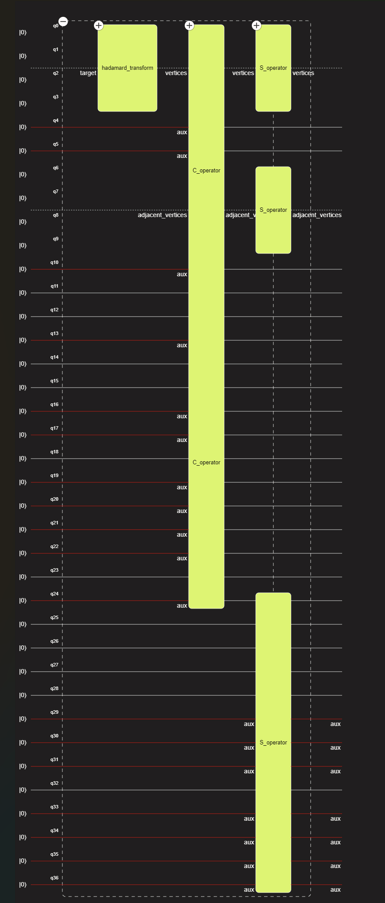

**Transpiled info:**

Depth: 3327

Width: 37

**Gate count**

U : 2702

CX : 2583

***The circuit could not be run due to high number of qubits.***

### Quantum Walk Circuit Explanation

The following quantum circuit represents the main function of the quantum walk, including the initialization of the walker, the application of the Hadamard transform, and the application of the coin and shift operators. Here is a step-by-step explanation of the circuit:

1. **Initialization**:
    - The circuit starts with the `vertices` and `adjacent_vertices` qubits in the $|0\rangle$ state.
    - An auxiliary qubit `aux` is also included, which is used in some operations for checking conditions and controlling gates.

2. **Hadamard Transform**:
    - The `hadamard_transform` gate is applied to the `vertices` qubits. This gate puts each qubit into an equal superposition of $ |0\rangle$  and $ |1\rangle$ , which means the walker is in a superposition of all possible positions along the line.

3. **Coin Operator**:
    - The `C_operator` is applied to the `vertices` and `adjacent_vertices` qubits.
    - The `C_operator` includes several sub-operations:
        - **prepare_minus**: Prepares an auxiliary qubit in the $ |-\rangle$ state.
        - **diffuzer_oracle**: Implements a diffuser oracle for Grover's algorithm to adjust the amplitude of states based on certain conditions.
        - **zero_diffuzer**: Applies the zero diffuser to the `adjacent_vertices`.
        - **C_iteration**: Applies the coin operator iteratively to each vertex, preparing the walker for the next step.

4. **Shift Operator**:
    - The `S_operator` is applied to the `vertices` and `adjacent_vertices` qubits.
    - The `S_operator` includes:
        - **edge_oracle**: Checks if two vertices are adjacent by comparing their values.
        - **bitwise_swap**: Swaps the values of two qubits bit by bit if the edge oracle confirms adjacency.

#### Detailed Walkthrough

- **Hadamard Transform (Step 2)**:
    - This is represented by a block labeled `hadamard_transform` on the `vertices` qubits.
    - It transforms the initial state of the `vertices` into a superposition of all possible states, preparing the walker to be in any position along the line.

- **Coin Operator (Step 3)**:
    - The `C_operator` block is applied to both `vertices` and `adjacent_vertices`.
    - Inside the `C_operator`, the walker’s state is manipulated to adjust the probabilities of moving to adjacent vertices.
    - This involves preparing the auxiliary qubit in the $|-\rangle$ state, applying the diffuser oracle to adjust state amplitudes, and performing iterations to ensure the walker’s state is properly updated for the next step.

- **Shift Operator (Step 4)**:
    - The `S_operator` block swaps the states of `vertices` and `adjacent_vertices` if they are adjacent.
    - The `edge_oracle` checks adjacency, and the `bitwise_swap` performs the actual swapping of states, allowing the walker to move to the next vertex based on the coin operator’s adjustments.

#### Conclusion

This circuit visually represents the steps involved in a single iteration of the quantum walk:
- Initialization with a Hadamard transform to create a superposition of positions.
- Application of the coin operator to adjust the walker’s state based on possible movements.
- Application of the shift operator to move the walker to an adjacent vertex according to the adjusted probabilities.

The combination of these steps models the discrete-time quantum walk on a line, with the walker transitioning between vertices according to the quantum operations defined.
